
- Costruire un dataset di grafi di spin glass di piccola taglia (# basso di nodi) e studiare come l'apprendimento dell'energia da parte della GNN cambia al variare della connettività del grafo. Ad esempio fissando a 10 il numero di nodi, il numero di edges può essere cambiato da 9 (open spin glass chain) a 45 (fully connected spin glass) , magari provando 9, 15, 25, 45. Si costruiscono 4 dataset e si allena la stessa GNN separatamente su questi dataset in modo supervised per fare poi il confronto. (Livello medio)

- Costruire un dataset di grafi di spin glass a taglia e connettività fissati (# nodi non troppo alto). Studiare la comparazione tra l'apprendimento della magnetizzazione o dell'energia tra un MLP e una GNN.  Ovviamente in questo caso va ricavata la matrice di adiacenza e la matrice delle features a partire dai grafi per poter allenare l'MLP. (Livello medio)


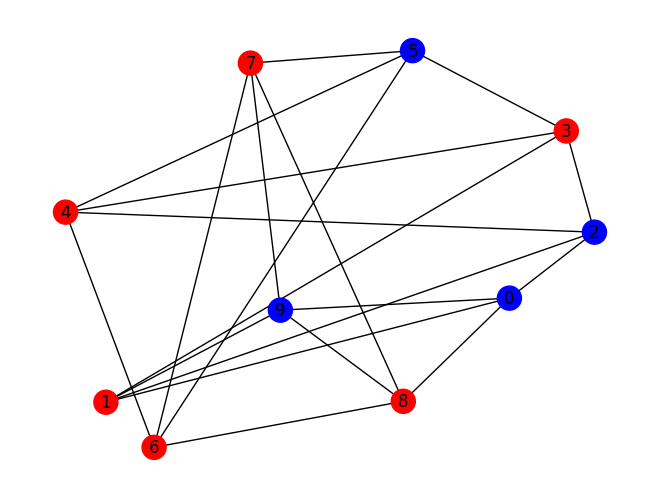

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def initialize_lattice(L):
    """
    Initialize an LxL lattice with spins randomly set to +1 or -1.
    """
    nodes = np.random.choice([-1, 1], size=(L))
    return nodes

def initialize_graph(L, periodic=True, num_neighbors=2):
    """
    Initialize a graph with L nodes
    """
    G = nx.Graph()
    G.add_nodes_from(range(L))
    for i in range(L):
        if periodic:
            for j in range(i+1, i+num_neighbors+1):
                G.add_edge(i, j % L, weight = np.random.rand()*2 -1 )
        else:
            for j in range(i+1, i+num_neighbors+1):
                if j < L:
                    G.add_edge(i, j, weight =1.0)
    return G
    
    
    

def plot_graph(G, nodes):
    """
    Plot the graph with nodes colored according to their spin.
    """
    colors = ['blue' if nodes[i] == 1 else 'red' for i in range(len(nodes))]
    nx.draw(G, node_color=colors, with_labels=True)
    plt.show()
    
L = 10
nodes = initialize_lattice(L)
G = initialize_graph(L)
plot_graph(G, nodes)


In [225]:
#extract randomly a number from -1 to 1
print(np.random.rand()*2 -1)


0.05349584452070144


In [227]:
#print edges attributes
#print(G.edges.data())
#G[1][0]['weight']
print(G.edges(0))

[(0, 1), (0, 2), (0, 8), (0, 9)]


In [235]:
G.adj
#Get adjacency matrix
A = nx.adjacency_matrix(G).todense()
print(A.shape)
#Get features matrix
F = np.array([nodes]).T
print(F)
Mat = np.concatenate((F,A), axis=1)
print(Mat)
print(Mat.shape)

(10, 10)
[[ 1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]]
[[ 1.          0.         -0.25939816  0.1968816   0.          0.
   0.          0.          0.          0.93241908  0.42181981]
 [-1.         -0.25939816  0.         -0.19602615 -0.70632511  0.
   0.          0.          0.          0.          0.90764851]
 [ 1.          0.1968816  -0.19602615  0.          0.07258517 -0.02062698
   0.          0.          0.          0.          0.        ]
 [-1.          0.         -0.70632511  0.07258517  0.         -0.99893828
   0.89578903  0.          0.          0.          0.        ]
 [-1.          0.          0.         -0.02062698 -0.99893828  0.
   0.37654528  0.2232187   0.          0.          0.        ]
 [ 1.          0.          0.          0.          0.89578903  0.37654528
   0.         -0.73405155  0.2848778   0.          0.        ]
 [-1.          0.          0.          0.          0.          0.2232187
  -0.73405155  0.         -0.3059776   0.16369801  0.      

In [165]:
def energy_ising(G, nodes, J=1, h=0):
    """
    Compute the energy of the lattice.
    """
    E = 0
    #Use g.edges to compute energy
    
       
       

-2.0


In [229]:
def energy_spin_glass(G, nodes, h=0):
    """
    Compute the energy of the lattice.
    """
    E = 0
    # Use weights to compute energy
    for i in range(len(nodes)):
        for j in G.neighbors(i):
            E += -G[i][j]['weight'] * nodes[i] * nodes[j] - h * nodes[i]
            
    return E / 2
print(energy_spin_glass(G, nodes)) 

4.646473937322193


In [230]:
for j in G.neighbors(0):
    print(j)

print("Number of nodes: ",G.number_of_nodes())
print("Number of edges: ",G.number_of_edges())

1
2
8
9
Number of nodes:  10
Number of edges:  20
